k-최근접 이웃 분류 알고리즘은  
간단히 샘플에 가장 가까운 샘플 k개를 선택하고  
그다음 샘플들의 클래스를 확인하여 다수 클래스를 새로운 샘플의 클래스로 예측  
  
k-최근접 이웃 회귀도 간단합니다.  
분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 k개를 선택함  
하지만 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치입니다.  


In [1]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

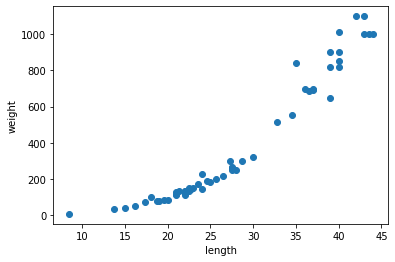

In [2]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [4]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [5]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [6]:
# reshape에서 넘파이는 배열 크기를 자동으로 지정하는 기능은 -1을 사용한다.
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [7]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

In [8]:
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [9]:
print(knr.score(test_input, test_target))

0.992809406101064


위에서까지 한 내용이 결정계수 R^2를 표현 해둔 것  
예측이 타깃에 평균정도를 예측하는 수준이면 R^2은 0에 가까워지고  
예측이 타깃에 아주 가까워지면 R^2은 1에 가까워진다.  

사이킷런의 score() 메서드가 출력하는 값은 높을수록 좋은 것   

In [10]:
from sklearn.metrics import mean_absolute_error

#테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

#테스트 세트에 대한 평균 절댓값 오차를 계산
#mean_absolute_error 타깃의 예측의 절댓값 오차를 평균하여 반환
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [11]:
#앞에서 사용한 모델을 활용한 결정계수를 확인
print(knr.score(train_input, train_target))

0.9698823289099254
